# Análisis exploratorio de una base de datos de películas

Usa la base de datos `./data/imdb.csv`


### 1. Importar `pandas`, `matplotlib` y `numpy`

In [82]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2. Leer la base de datos del archivo csv a pandas

In [83]:
df = pd.read_csv("./data/imdb.csv")

### 3. Mostrar las  primeras y últimas filas del dataframe. Hacerlo con el valor default y pasando como argumento el número entero de filas que se deseen inspeccionar.

In [84]:
print(df.head())
print(df.tail(3))

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

### 4. Continúa inspeccionando el archivo viendo todas las columnas del dataframe

In [85]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### 5. Imprime los primeros valores de la variable `Rank`

In [86]:
df["Rank"].head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

### 6. Demuestra que es mejor tener nombres de columnas sin espacios (notación corchetes y notación punto-variable).

In [87]:
print(df.Rank.head())

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64


### 7. Renombra las columnas que tengan espacios

In [88]:
df.rename(columns={
    "Runtime (Minutes)": "Runtime",
    "Revenue (Millions)": "Revenue_Millions"
}, inplace=True)    
    

### 8. Utiliza tus nuevas columnas sin espacios :)

In [89]:
df.Revenue_Millions.head()

0    333.13
1    126.46
2    138.12
3    270.32
4    325.02
Name: Revenue_Millions, dtype: float64

### 9. Visualiza la info de todo tu dataframe

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Description       1000 non-null   object 
 4   Director          1000 non-null   object 
 5   Actors            1000 non-null   object 
 6   Year              1000 non-null   int64  
 7   Runtime           1000 non-null   int64  
 8   Rating            1000 non-null   float64
 9   Votes             1000 non-null   int64  
 10  Revenue_Millions  872 non-null    float64
 11  Metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### 10. Inspecciona si hay columnas que tengan valores `NA`

In [91]:
df.isnull().any()

Rank                False
Title               False
Genre               False
Description         False
Director            False
Actors              False
Year                False
Runtime             False
Rating              False
Votes               False
Revenue_Millions     True
Metascore            True
dtype: bool

### 11. Imprime el número total de valores NA que haya en cada columna. Hazlo primero para la columna `Metascore` y después utiliza un ciclo for para hacerlo para todas las columnas

In [92]:
print("Metascore NAs:", df["Metascore"].isnull().sum())

print("-" * 20)

for col in df.columns:
    nulos = df[col].isnull().sum()
    print(f"{col}: {nulos}")

Metascore NAs: 64
--------------------
Rank: 0
Title: 0
Genre: 0
Description: 0
Director: 0
Actors: 0
Year: 0
Runtime: 0
Rating: 0
Votes: 0
Revenue_Millions: 128
Metascore: 64


### 12. Usa la magia de `dropna()`

In [93]:
df = df.dropna()

### 13. Vuelve a ver la info del dataset

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              838 non-null    int64  
 1   Title             838 non-null    object 
 2   Genre             838 non-null    object 
 3   Description       838 non-null    object 
 4   Director          838 non-null    object 
 5   Actors            838 non-null    object 
 6   Year              838 non-null    int64  
 7   Runtime           838 non-null    int64  
 8   Rating            838 non-null    float64
 9   Votes             838 non-null    int64  
 10  Revenue_Millions  838 non-null    float64
 11  Metascore         838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


### 14. Genera estadísticos descriptivos con el método `describe()`

In [95]:
df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


### 15. Crea un histograma de la variable Metascore. Utiliza 10 cubetas

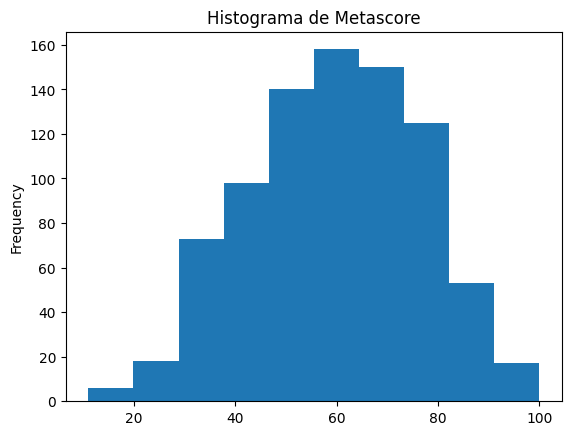

In [96]:
df["Metascore"].plot(kind="hist", bins=10, title="Histograma de Metascore")
plt.show()

### 16. Crea un histograma de la variable Rating. Utiliza 10 cubetas

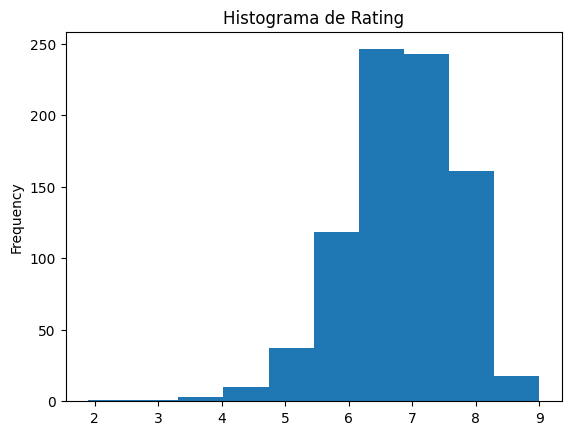

In [97]:
df["Rating"].plot(kind="hist", bins=10, title="Histograma de Rating")
plt.show()

### 17. Vuelve a describir el dataframe y observa la media de la variable `Ratings`

In [98]:
df["Rating"].mean()

np.float64(6.814319809069212)

### 18. Calcula este promedio con Numpy y después con un método de Pandas

In [99]:
promedio_np = np.mean(df["Rating"])
promedio_pd = df["Rating"].mean()

print(f"Numpy: {promedio_np}, Pandas: {promedio_pd}")

Numpy: 6.814319809069212, Pandas: 6.814319809069212


### 19. Obten los valores únicos de la variable Rating y después ordénalos de menor a mayor

In [100]:
sorted(df["Rating"].unique())

[np.float64(1.9),
 np.float64(2.7),
 np.float64(3.9),
 np.float64(4.0),
 np.float64(4.1),
 np.float64(4.3),
 np.float64(4.4),
 np.float64(4.6),
 np.float64(4.7),
 np.float64(4.8),
 np.float64(4.9),
 np.float64(5.0),
 np.float64(5.1),
 np.float64(5.2),
 np.float64(5.3),
 np.float64(5.4),
 np.float64(5.5),
 np.float64(5.6),
 np.float64(5.7),
 np.float64(5.8),
 np.float64(5.9),
 np.float64(6.0),
 np.float64(6.1),
 np.float64(6.2),
 np.float64(6.3),
 np.float64(6.4),
 np.float64(6.5),
 np.float64(6.6),
 np.float64(6.7),
 np.float64(6.8),
 np.float64(6.9),
 np.float64(7.0),
 np.float64(7.1),
 np.float64(7.2),
 np.float64(7.3),
 np.float64(7.4),
 np.float64(7.5),
 np.float64(7.6),
 np.float64(7.7),
 np.float64(7.8),
 np.float64(7.9),
 np.float64(8.0),
 np.float64(8.1),
 np.float64(8.2),
 np.float64(8.3),
 np.float64(8.4),
 np.float64(8.5),
 np.float64(8.6),
 np.float64(8.8),
 np.float64(9.0)]

### 20. Observa los ratings que te interesen y ahora filtra el dataframe con ese rating para ver cuáles son las películas con dicho rating

In [101]:
peliculas_8 = df[df["Rating"] == 8.0]
peliculas_8.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
33,34,Deadpool,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
129,130,The Revenant,"Adventure,Drama,Thriller",A frontiersman on a fur trading expedition in ...,Alejandro González Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",2015,156,8.0,499424,183.64,76.0
140,141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,82.0


### 21. Obten los valores únicos de la variable Rating y la frecuencia total de cada uno de estos valores. Posteriormente crea un nuevo dataframe con essos valores

In [102]:
conteo_ratings = df['Rating'].value_counts()
df_ratings = pd.DataFrame({
    'Rating': conteo_ratings.index,
    'Frecuencia': conteo_ratings.values
})

### 22. Ordena el nuevo dataframe por la variable `rating`

In [103]:
df_ratings_ordenado = df_ratings.sort_values(by="Rating")
df_ratings_ordenado.head()

,Rating,Frecuencia
46,1.9,1
47,2.7,1
38,3.9,2
45,4.0,1
43,4.1,1


### 23. Crea una gráfica de barras con este nuevo dataframe ordenado

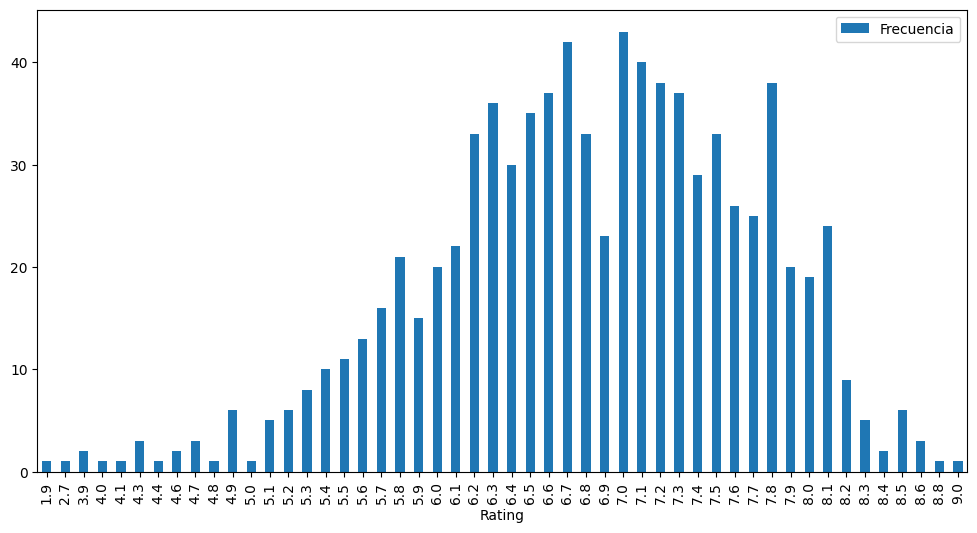

In [104]:
df_ratings_ordenado.plot(kind="bar", x="Rating", y="Frecuencia", figsize=(12,6))
plt.show()

### 24. Crea la matriz de correlación del dataframe de películas

In [105]:
correlacion = df.corr(numeric_only=True)
correlacion

,Rank,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
Rank,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909
Year,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303
Runtime,-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397
Rating,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731
Votes,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674
Revenue_Millions,-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


### 25. Grafica la matriz de correlación utilizando `matshow()`

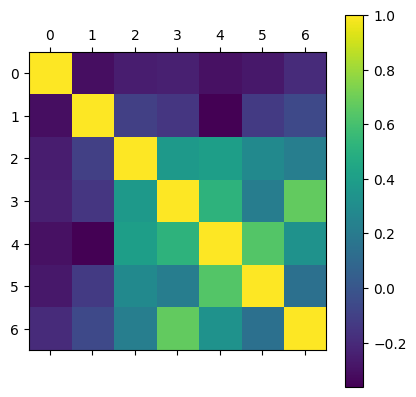

In [106]:
plt.matshow(correlacion)
plt.colorbar()
plt.show()